In [1]:
from openff.toolkit.topology import Molecule
from openff.bespokefit.workflows import BespokeWorkflowFactory
from openff.fragmenter.fragment import WBOFragmenter
from utils import depict_fragment, display_in_grid
from rdkit import Chem

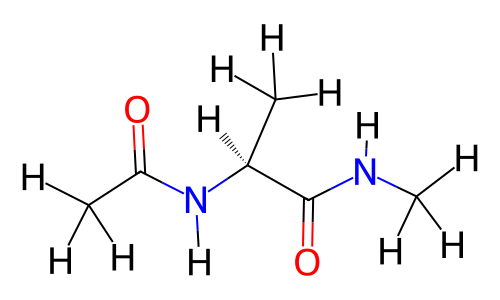

In [2]:
mol = Molecule.from_smiles("O=C(C)N[C@H](C(NC)=O)C")
mol

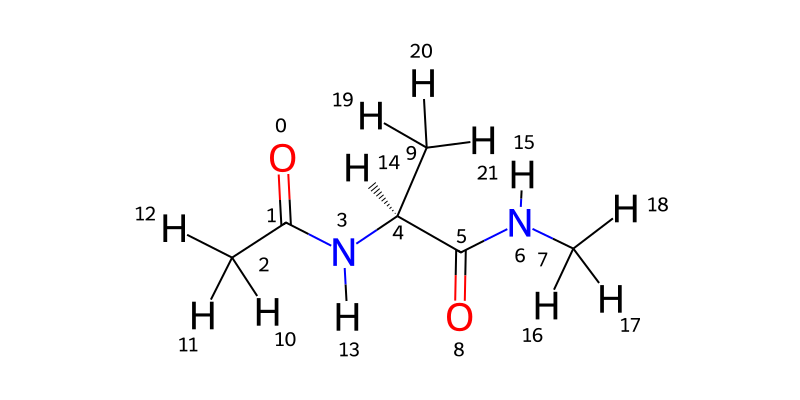

In [3]:
from utils_toolkit import draw_molecule

draw_molecule(mol, atom_notes={i: str(i) for i in range(mol.n_atoms)}, explicit_hydrogens=True, image_width=800, image_height=400)

In [4]:
factory = BespokeWorkflowFactory()
factory.target_torsion_smirks = ['[*]~[*:1]~[*:2]~[*]'] # all torsions?

In [5]:
torsion_smirks = factory.target_torsion_smirks[0]
torsion_smirks

'[*]~[*:1]~[*:2]~[*]'

In [6]:
fragmenter = WBOFragmenter()
fragmentations = fragmenter.fragment(mol, target_bond_smarts=[torsion_smirks])
fragmentations

FragmentationResult(parent_smiles='[O:1]=[C:3]([N:6]([C@:10]([C:4](=[O:2])[N:5]([C:8]([H:16])([H:17])[H:18])[H:11])([C:9]([H:19])([H:20])[H:21])[H:22])[H:12])[C:7]([H:13])([H:14])[H:15]', fragments=[Fragment(smiles='[O:1]=[C:3]([N:6]([C@:10]([C:4](=[O:2])[N:5]([C:8]([H:16])([H:17])[H:18])[H:11])([C:9]([H:19])([H:20])[H:21])[H:22])[H:12])[C:7]([H:13])([H:14])[H:15]', bond_indices=(4, 5)), Fragment(smiles='[O:1]=[C:3]([N:6]([C@:10]([C:4](=[O:2])[N:5]([C:8]([H:16])([H:17])[H:18])[H:11])([C:9]([H:19])([H:20])[H:21])[H:22])[H:12])[C:7]([H:13])([H:14])[H:15]', bond_indices=(9, 10)), Fragment(smiles='[H][C:10]([H])([N:6]([C:3](=[O:1])[C:7]([H:13])([H:14])[H:15])[H:12])[H:22]', bond_indices=(3, 7)), Fragment(smiles='[O:1]=[C:3]([N:6]([C@:10]([C:4](=[O:2])[N:5]([C:8]([H:16])([H:17])[H:18])[H:11])([C:9]([H:19])([H:20])[H:21])[H:22])[H:12])[C:7]([H:13])([H:14])[H:15]', bond_indices=(4, 10)), Fragment(smiles='[O:1]=[C:3]([N:6]([C@:10]([C:4](=[O:2])[N:5]([C:8]([H:16])([H:17])[H:18])[H:11])([C:9]([H

In [7]:
fragment_diagrams = [depict_fragment(fragmentations.parent_molecule, fragment) for fragment in fragmentations.fragments]
display_in_grid(fragment_diagrams) # some fragments might be repeated

GridBox(children=(Output(), Output(), Output(), Output(), Output(), Output(), Output()), layout=Layout(grid_te…

In [8]:
fragment_diagrams_all = []

size = 500

for fragment in fragmentations.fragments:
    fragment_diagrams_all.append(
        depict_fragment(
            fragmentations.parent_molecule, 
            fragment,
            width=size,
            height=size//2,
        )
    )

display_in_grid(fragment_diagrams_all, width=size) 

GridBox(children=(Output(), Output(), Output(), Output(), Output(), Output(), Output()), layout=Layout(grid_te…

Identifying distinct fragments

In [9]:
smiles_list = []

for i in fragmentations.fragments:
    smiles_list.append(i.smiles)

In [ ]:
smiles_list_no_numbers = []

for smls in smiles_list:
    # removing numbers from smiles
    m = Chem.MolFromSmiles(smls)
    for atom in m.GetAtoms():
        atom.SetAtomMapNum(0)
    new_smls = Chem.MolToSmiles(m)
    smiles_list_no_numbers.append(new_smls)

In [ ]:
unique_fragments = []

for smile in smiles_list_no_numbers:
    if smile in unique_fragments:
        pass
    else:
        unique_fragments.append(smile)
        
unique_fragments

['CNC(=O)[C@H](C)NC(C)=O', 'CNC(C)=O']